In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

### Importing dataset

In [2]:
data = pd.read_csv("diabetes.csv")

### Viewing dataset Structure

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Description of columns except outcome - 
1. Pregnancies - Number of pregnancies
2. Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Blood Pressure - Diastolic blood pressure (mm Hg)
4. Skin Thickness - Triceps skin fold thickness (mm)
5. Insulin - 2-Hour serum insulin (mu U/ml)
6. BMI - Body mass index (weight in kg/(height in m)^2)
7. Diabetes Pedigree Function - Diabetes pedigree function
8. Age - Age in years


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Exploring the dataset

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# finding the number of nans

In [7]:
for i in data.columns:
    print(f"{i} has {np.isnan(data[i]).sum()} nans")

Pregnancies has 0 nans
Glucose has 0 nans
BloodPressure has 0 nans
SkinThickness has 0 nans
Insulin has 0 nans
BMI has 0 nans
DiabetesPedigreeFunction has 0 nans
Age has 0 nans
Outcome has 0 nans


In [8]:
# Finding the number of unique values

In [9]:
for i in data.columns:
    print(f"{i} has {len(np.unique(data[i]))} unique values")

Pregnancies has 17 unique values
Glucose has 136 unique values
BloodPressure has 47 unique values
SkinThickness has 51 unique values
Insulin has 186 unique values
BMI has 248 unique values
DiabetesPedigreeFunction has 517 unique values
Age has 52 unique values
Outcome has 2 unique values


In [10]:
data["Outcome_category"] = data["Outcome"].apply(str).replace({"1":"Diabetic","0":"Non Diabetic"})

C:\Users\Varun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


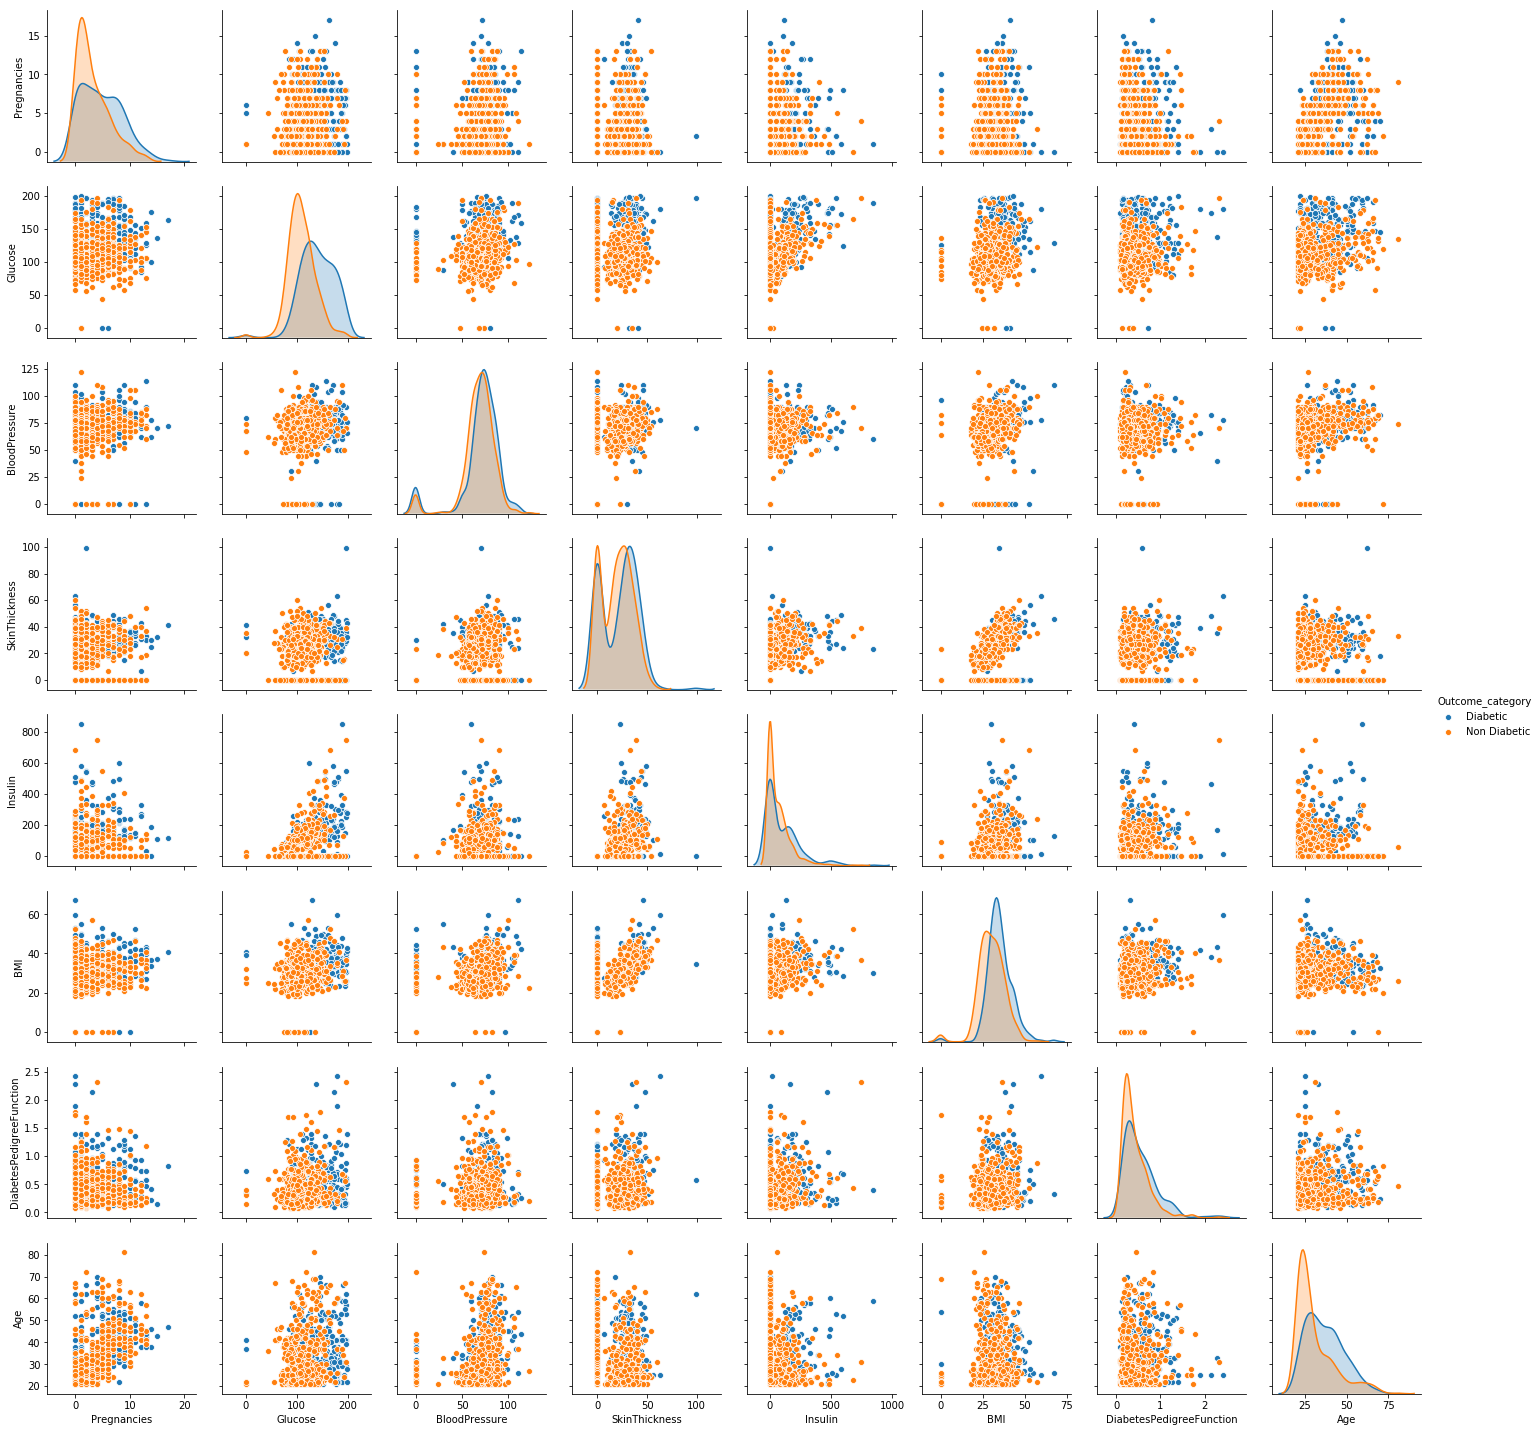

In [11]:
sns.pairplot(data.drop("Outcome",axis=1),hue = "Outcome_category")

Text(0.5, 0, '% of instances : Diabetic vs Non Diabetic')

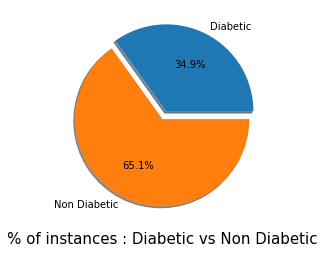

In [12]:
plt.pie([i for i in data.groupby("Outcome_category")["Outcome_category"].count()],explode = [0.1,0],labels = ["Diabetic","Non Diabetic"],autopct='%1.1f%%',shadow=True)
plt.xlabel("% of instances : Diabetic vs Non Diabetic",size= 15)

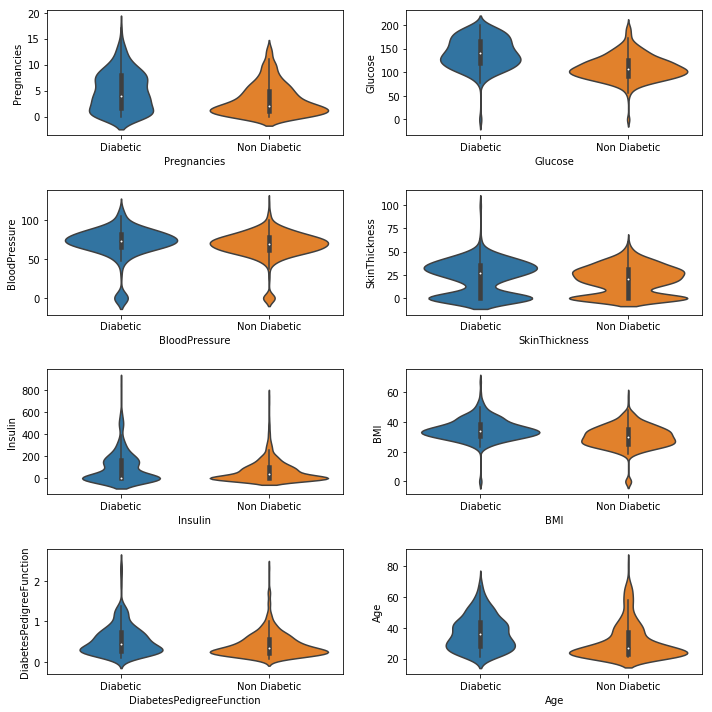

In [13]:
axes = ["ax1","ax2","ax3","ax4","ax5","ax6","ax7","ax8"]
plt.figure(figsize = (10,10))
for index,i in enumerate([421,422,423,424,425,426,427,428]):
    plt.subplot(i)
    axes[index] = sns.violinplot(y= data[data.columns[index]],x=data["Outcome_category"])
    plt.xlabel(data.columns[index])
    plt.tight_layout(h_pad=2,w_pad=2)

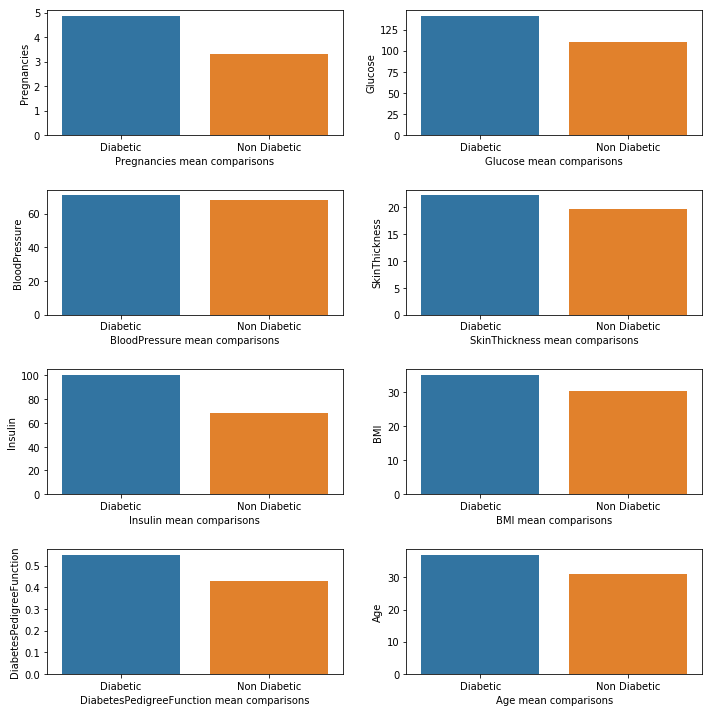

In [14]:
axes = ["ax1","ax2","ax3","ax4","ax5","ax6","ax7","ax8"]
plt.figure(figsize = (10,10))
for index,i in enumerate([421,422,423,424,425,426,427,428]):
    plt.subplot(i)
    axes[index] = sns.barplot(y= data[data.columns[index]].apply(np.mean),x=data["Outcome_category"],ci = None)
    plt.xlabel(f"{data.columns[index]} mean comparisons")
    plt.tight_layout(h_pad=2,w_pad=2)

### Selection of features

In [15]:
from sklearn.feature_selection import SelectKBest , chi2 , f_classif
from sklearn.ensemble import ExtraTreesClassifier

Text(0.5, 1.0, 'CORRELATION MATRIX')

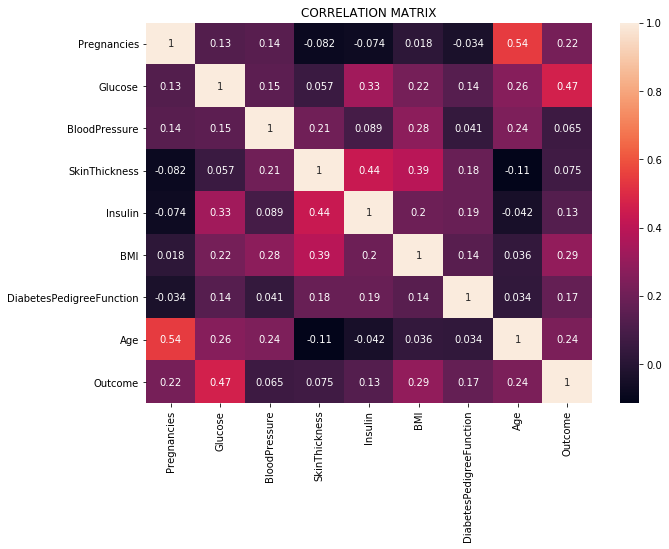

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot = True)
plt.title("CORRELATION MATRIX",pad = 6)

In [17]:
model = ExtraTreesClassifier()

In [18]:
model.fit(data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]],data["Outcome"])

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Text(0.5, 1.0, '% of importance to determine Target label')

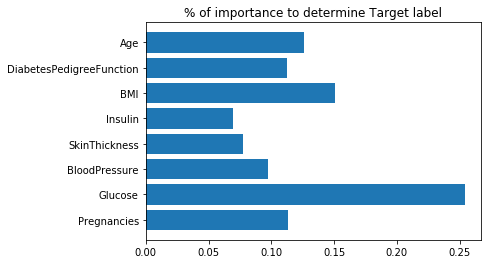

In [19]:
plt.barh(y = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"],width = model.feature_importances_)
plt.title("% of importance to determine Target label")

Though we can see that Age, DiabetesPedigreeFunction , Glucose and bmi are important factors, we can't dismiss the importance of pregnancies and Blood Pressure too. Even insulin can have an impact as seen in EDA. Hence, it will consider all factors

Therefore, we can use Ridge Regression as it will take all factors into consideration and shrink coefficient of factors that are of less importance but still keep them in the equation.

### Model Building

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [22]:
x_data = data[["BMI","Glucose","Age","DiabetesPedigreeFunction","Pregnancies","Insulin","SkinThickness","BloodPressure"]]

In [23]:
y_data = data["Outcome"]

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
X_train , X_test , y_train , y_test = train_test_split(x_data,y_data,random_state = 74,test_size = 0.20)

In [26]:
scaler = StandardScaler().fit(X_train)

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [27]:
X_train = scaler.transform(X_train)

C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [28]:
X_test = scaler.transform(X_test)

C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [29]:
LR = LogisticRegression(penalty="l2",C = 0.05).fit(X_train,y_train)

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Evaluation

In [30]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , precision_recall_curve , roc_auc_score , roc_curve,classification_report, confusion_matrix 

In [31]:
LR_predictions = LR.predict(X_test)

In [32]:
accuracy_score(y_test,LR_predictions)

0.8441558441558441

In [33]:
recall_score(y_test,LR_predictions)

0.7

In [34]:
precision_score(y_test,LR_predictions)

0.7954545454545454

In [35]:
roc_auc_score(y_test,LR.predict_proba(X_test)[0:,1])

0.8682692307692307

In [36]:
print("Accuracy of Ridge Linear Regression Model :",accuracy_score(y_test,LR_predictions))
print(classification_report(y_test,LR_predictions))

Accuracy of Ridge Linear Regression Model : 0.8441558441558441
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       104
           1       0.80      0.70      0.74        50

   micro avg       0.84      0.84      0.84       154
   macro avg       0.83      0.81      0.82       154
weighted avg       0.84      0.84      0.84       154



Text(0.5, 1.0, 'CONFUSION MATRIX')

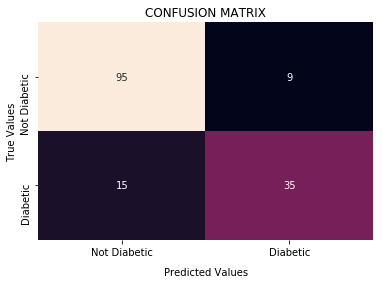

In [37]:
plt.figure()
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,LR_predictions),cbar = False,annot = True)
ax.set_xlabel("Predicted Values",labelpad = 10)
ax.set_ylabel("True Values")
ax.xaxis.set_ticklabels(["Not Diabetic","Diabetic"])
ax.yaxis.set_ticklabels(["Not Diabetic","Diabetic"])
ax.set_title("CONFUSION MATRIX")

ROC_AUC Score for Ridge Regression model : 0.8682692307692307


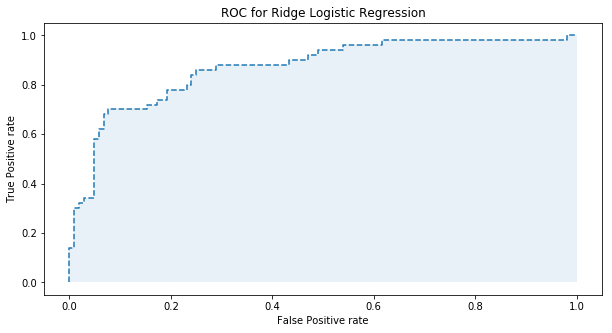

In [38]:
LR_predict_prob = LR.predict_proba(X_test)
LR_predict_prob = LR_predict_prob[:,1]
fpr, tpr , threshold = roc_curve(y_test,LR_predict_prob)

plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,linestyle = "--")
plt.fill_between(fpr,tpr,alpha = 0.1)
plt.title("ROC for Ridge Logistic Regression")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
print("ROC_AUC Score for Ridge Regression model :",roc_auc_score(y_test,LR_predict_prob))
